In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

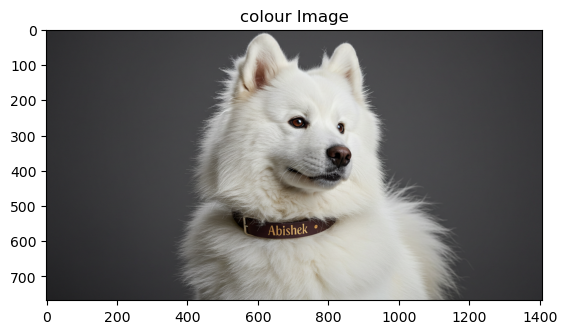

In [2]:
image_path = "Image_1.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("colour Image")
plt.show()

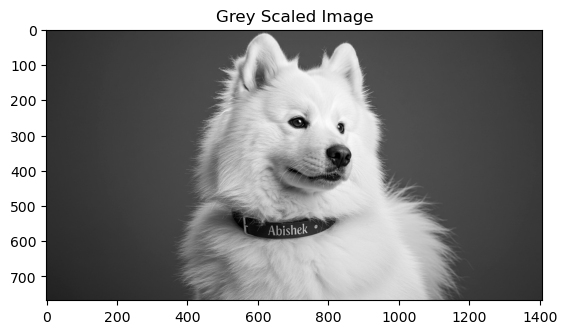

In [3]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap="gray")
plt.title("Grey Scaled Image")
plt.show()

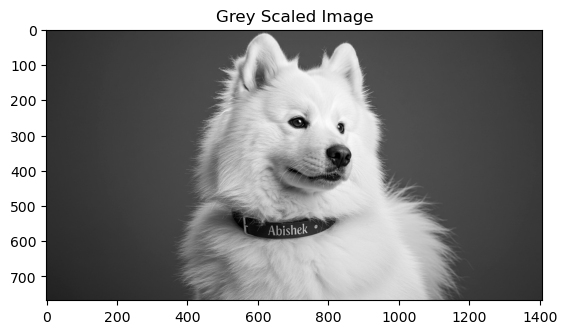

In [4]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap="gray")
plt.title("Grey Scaled Image")
plt.savefig("grey_scale.jpeg")
plt.show()

In [5]:
print(image.shape)

(768, 1408)


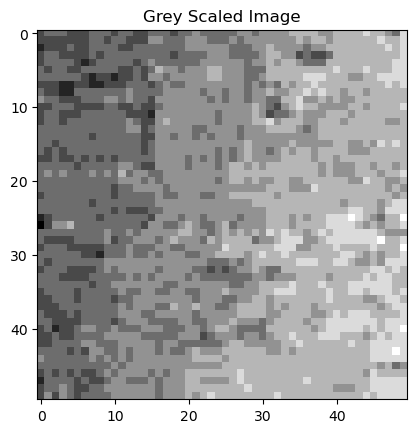

In [6]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image[50:100, 100:150]

plt.imshow(image, cmap="gray")
plt.title("Grey Scaled Image")
plt.show()

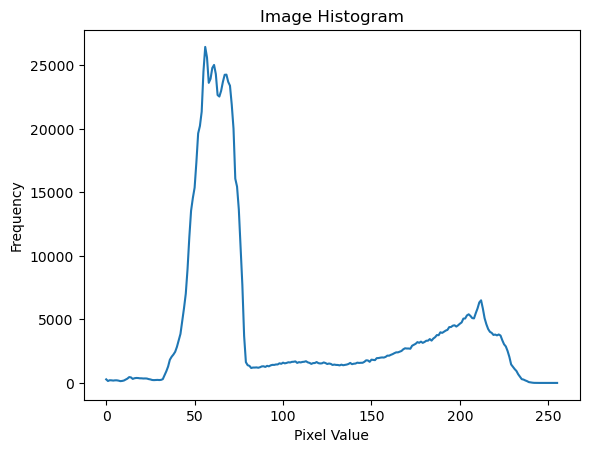

In [7]:
# Calculate histogram using OpenCV

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(hist)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [8]:
import keras
from tensorflow.keras.utils import load_img

# load the image
img = load_img(image_path)

# Find more about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# Show the image
img.show()

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(1408, 768)


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [10]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the images and normalize pixel values to be between 0 and 1
X_train = X_train.reshape(-1, 28, 28, 1).astype("float64") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float64") / 255.0

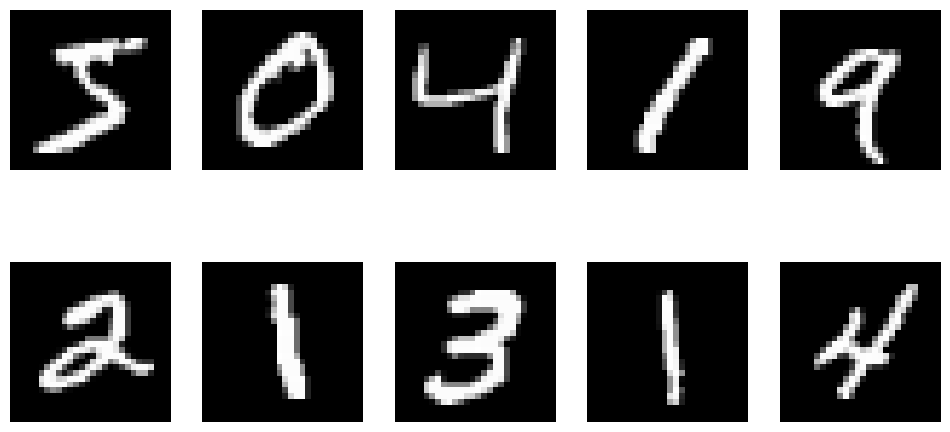

In [11]:
# Display images and corresponding class names

num_rows, num_cols = 2, 5  # Display 2 rows and 5 columns of images

plt.figure(figsize=(12, 6))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    # plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis("off")

plt.show()

In [12]:
# One-hot encode the labels

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
# Build the CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8678 - loss: 0.4148 - val_accuracy: 0.9840 - val_loss: 0.0495
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9841 - loss: 0.0507 - val_accuracy: 0.9870 - val_loss: 0.0369
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9928 - loss: 0.0262 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9936 - loss: 0.0212 - val_accuracy: 0.9873 - val_loss: 0.0365


In [16]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0464     
Test Accuracy: 98.73%


In [17]:
# Predictions on the test set
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [18]:
# Find the indices of correctly and incorrectly classified images

correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))[
    0
]

incorrect_indices = np.where(
    np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1)
)[0]

In [19]:
# Display examples of the correctly classified images

plt.figure(figsize=(12, 6))
plt.suptitle("Correctly classified images", fontsize=16)

Text(0.5, 0.98, 'Correctly classified images')

<Figure size 1200x600 with 0 Axes>

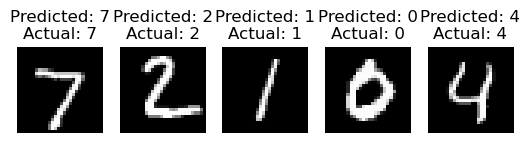

In [20]:
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[correct_indices[i]].reshape(28, 28), cmap="gray")
    
    plt.title(
        f"Predicted: {np.argmax(predictions[correct_indices[i]])}\nActual: {np.argmax(y_test[correct_indices[i]])}"
    )
    
    plt.axis("off")

In [21]:
# Display examples of the misclassified images

plt.figure(figsize=(12, 6))
plt.suptitle("Misclassified Images", fontsize=16)

Text(0.5, 0.98, 'Misclassified Images')

<Figure size 1200x600 with 0 Axes>

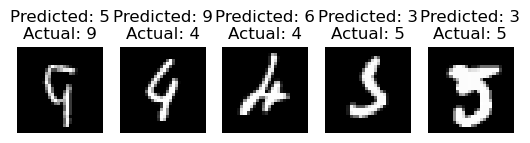

In [22]:
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[incorrect_indices[i]].reshape(28, 28), cmap="gray")
    
    plt.title(
        f"Predicted: {np.argmax(predictions[incorrect_indices[i]])}\nActual: {np.argmax(y_test[incorrect_indices[i]])}"
    )
    
    plt.axis("off")

plt.show()